In this article, I will show the necessary steps using Python to find Spearman's rank correlation coefficient.

Spearman's rank correlation uses ordinal data. Examples of ordinal data are:

- 1st, 2nd, 3rd, 
- Small, Medium, Large, XL,
- Strongly agree, Agree, Neutral, Disagree, Strongly Disagree
- Very often, Often, Not Often, Not at all

Spearman's rank correlation coefficient, $r_s$ shows the correlation between two ordinal data how one ordinal data increases or decreases as the other ordinal increases which are described as "monotonic". 

$$r_s=1-\frac{6\sum d^2}{n(n^2-1)}$$

This formla is an alternative to Pearson's correlation if the the data are ordinal and monotonic and if there are no ties in data.

A value of 1 means the set of data is strictly increasing and the value of -1 means it is strictly decreasing. A value of 0 means that data shows no monotonic behavior. the Spearman correlation between two variables will be high when an observation has a similar rank between the two variables.

You can find all the code from this [link](https://github.com/shinokada/python-for-ib-diploma-mathematics/blob/master/Spearman's%20rank%20correlation%20coefficient.ipynb).

Let's start.

We need to import necessary libraries.

In [21]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from scipy.stats import spearmanr

## Example of the Spearman's Rank Correlation Test using two sets of list.

Let's find how the correlation of the rank at 5km relate to the rank of 10km run.

In [46]:
fivekm = [1,2,3,4,5,6,7]
tenkm=[3,2,1,5,7,4,6]
rs, pval = spearmanr(fivekm, tenkm)
print('rs=%.6f, p-value=%.6f' % (rs, pval))
if pval < 0.05:
	print('At 5% level of significance, the final rankings is significant or dependent')
else:
	print('At 5% level of significance, the final rankings is not significant or independent')

rs=0.678571, p-value=0.093750
At 5% level of significance, the final rankings is not significant or independent


p-value is the level of significance. It determines the probability that the correlation happened by chance.


Example using Pandas dataframe.

In [13]:
race = pd.DataFrame(
    [
        [1,3],
        [2,2],
        [3,1],
        [4,5],
        [5,7],
        [6,4],
        [7,6]
    ],
    columns=["After 5km","End of race"])
race

,After 5km,End of race
0,1,3
1,2,2
2,3,1
3,4,5
4,5,7
5,6,4
6,7,6


Let's plot this data using Pandas plot().

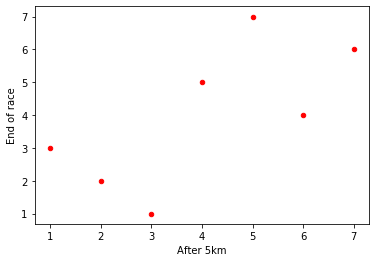

In [20]:
race.plot.scatter(x='After 5km',y='End of race',c='red')

We can plot using Seaborn.

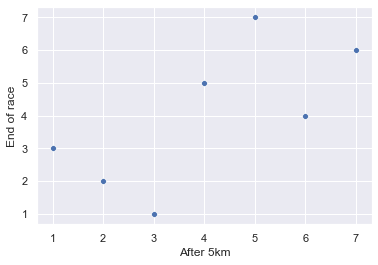

In [22]:
sns.scatterplot(x='After 5km',y='End of race',data=race)

We find $r_s$ and p-value.

In [34]:
rs, pval = spearmanr(race)
print('rs=%.6f, p-value=%.6f' % (rs, pval))

rs=0.678571, p-value=0.093750


You can use raw data and `spearmanr`  

In [35]:
rawdata = pd.DataFrame(
    [
        [3,4],
        [5,4],
        [6,2],
        [6,4],
        [8,9],
        [11,7]
    ],
    columns=["Set A","Set B"])
print(rawdata)
rs, pval = spearmanr(rawdata)
print('rs=%.6f, p-value=%.6f' % (rs, pval))

   Set A  Set B
0      3      4
1      5      4
2      6      2
3      6      4
4      8      9
5     11      7
rs=0.585239, p-value=0.222365


In [36]:
ordinaldata = pd.DataFrame(
    [
        [1.0,3],
        [2.0,3],
        [3.5,1],
        [3.5,3],
        [5.0,6],
        [6.0,5]
    ],
    columns=["Ranking of A","Ranking of B"])
print(ordinaldata)
rs, pval = spearmanr(ordinaldata)
print('rs=%.6f, p-value=%.6f' % (rs, pval))

   Ranking of A  Ranking of B
0           1.0             3
1           2.0             3
2           3.5             1
3           3.5             3
4           5.0             6
5           6.0             5
rs=0.585239, p-value=0.222365


Finding ranking of the above data and 

In [37]:
race2 = pd.DataFrame(
    [
        [1,1],
        [2,2],
        [3,3],
        [4,4],
        [5,5],
        [6,6],
        [7,7]
    ],
    columns=["After 5km","End of race"])
rs, pval = spearmanr(race2)
print('rs=%.6f, p-value=%.6f' % (rs, pval))

rs=1.000000, p-value=0.000000


In [38]:
race3 = pd.DataFrame(
    [
        [1,7],
        [2,6],
        [3,5],
        [4,4],
        [5,3],
        [6,2],
        [7,1]
    ],
    columns=["After 5km","End of race"])
rs, pval = spearmanr(race3)
print('rs=%.6f, p-value=%.6f' % (rs, pval))

rs=-1.000000, p-value=0.000000


In [40]:
race4 = pd.DataFrame(
    [
        [1,6],
        [4,7],
        [3,1],
        [2,8],
        [6,5],
        [7,2],
        [8,4]
    ],
    columns=["After 5km","End of race"])
rs, pval = spearmanr(race4)
print('rs=%.6f, p-value=%.6f' % (rs, pval))

rs=-0.464286, p-value=0.293934


# Examples to use Spearman's correlation are:

- [IQ of a person with the number of hours spent on games](https://www.wikiwand.com/en/Spearman%27s_rank_correlation_coefficient)
- [Physics and Math ranks](https://www.statisticshowto.datasciencecentral.com/spearman-rank-correlation-definition-calculate/)
- [Free university meals and their CGPA scores](https://www.toppr.com/guides/business-mathematics-and-statistics/correlation-and-regression/rank-correlation/)

You can use [the null hypothesis for this test](https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide-2.php). 

# Reference

- To compare the Spearman correlation and the Pearson correlation, please read [A comparison of the Pearson and Spearman correlation here](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) 

- 

-

-


